In [2]:
import pandas as pd

In [3]:
# Load CSV file
df = pd.read_csv("saas-businesses-data.csv")

In [4]:
print("🔍 Previewing the first 5 rows of the dataset:")
display(df.head())

🔍 Previewing the first 5 rows of the dataset:


,date,askingPrice,revenueMultiple,listingHeadline,listingType,totalRevenueAnnual,totalProfitAnnual,totalGrowthAnnual,location,dateFounded,...,about,revenue,customers,keywords,annualProfit,growthAnnual,techStack,businessModel,competitors,weeklyViews
0,4/5/2023,11693846,7.1,Low-Code SaaS Platform specifically designed ...,platinum,1635872,798854,15.0,Mexico,5/1/2016,...,"Profitable SaaS with $1,635,872 in TTM revenue...",1635872.00,10-100,"Mexico, LowCode, Low Code, Finance, Fintech",798854,15.0,Our product is built on:\nNginx\nReact\nJboss\...,"Our business operates on a SaaS model, targeti...","['https://kissflow.com/', 'https://www.modyo.c...",126
1,3/29/2023,1000000,0.7,"High-quality, ethical, and global proxy lists ...",platinum,1440000,150000,25.0,Belgium,1/1/2020,...,"Profitable SaaS with $1,400,000 in TTM revenue...",1500000.00,1000-10000,"web scraping, scraping, proxies, proxy",150000,25.0,"PHP, Ubuntu, HTML, CSS, JS",Please note that our accounting year ends in J...,"['Webshare', 'Proxyrack', 'Smartproxy']",5
2,3/29/2023,1500000,5.0,"Cost-effective, no-code platform for SMBs to c...",platinum,300000,100000,105.0,Turkey,3/1/2014,...,"Profitable SaaS with $300,000 in TTM revenue a...",300000.00,100-1000,"SaaS, mobile app builder",100000,105.0,Backend : .Net Core\nFrontend : Angular\nMobil...,"As a SaaS company, our business model is based...","['Goodbarber', 'Shoutem', 'Biznessapps', 'Adal...",4
3,3/9/2023,1800000,1.5,Social Media Management and Growth Software.,platinum,1230000,375000,NaN,United States,8/1/2022,...,Profitable SaaS ChatGPT-powered social media m...,2028286.44,1000-10000,saas,375000,0.0,"AWS, React",B2B Self-Serve SaaS with three monthly pricin...,['Kicksta'],8
4,2/28/2023,7302360,5.0,CRM Software (Saas) with Email and Whatsapp au...,platinum,1460472,521376,112.0,Argentina,1/1/2019,...,"Profitable SaaS with $1,460,472 in TTM revenue...",1460472.00,100-1000,"CRM, Saas, Latam, Sales, Automation",521376,112.0,PHP/Laravel - NodeJS/Typescript - Serverless/L...,B2B Saas charging a monthly recurring fee: $99...,"['Hubspot', 'Pipedrive', 'Zoho']",18


In [6]:
data_types = df.dtypes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100).round(2)

In [7]:
# Combine into one summary DataFrame
summary = pd.DataFrame({
    "Data Type": data_types,
    "Missing Values": missing_values,
    "Missing %": missing_percent
})

In [8]:
# Display summary
display(summary.sort_values(by="Missing %", ascending=False))

,Data Type,Missing Values,Missing %
totalGrowthAnnual,float64,37,29.37
location,object,29,23.02
listingHeadline,object,13,10.32
customers,object,2,1.59
techStack,object,2,1.59
listingType,object,0,0.00
revenueMultiple,float64,0,0.00
askingPrice,int64,0,0.00
date,object,0,0.00
dateFounded,object,0,0.00


**Step 3:**

Goal: Data Cleaning + Feature Engineering

Cleaning missing values (fill/drop strategy)?

Or Engineering new features like:

profitMargin = profit / revenue

companyAge = 2023 - dateFounded

growthCategory = high/medium/low based on growth %

In [10]:
# 1. Fill 'totalGrowthAnnual' using assignment, not inplace
df['totalGrowthAnnual'] = df['totalGrowthAnnual'].fillna(df['totalGrowthAnnual'].median())

In [11]:
# 2. Fill 'location' with "Unknown"
df['location'] = df['location'].fillna("Unknown")

In [12]:
# 3. Drop rows with missing 'listingHeadline'
df = df.dropna(subset=['listingHeadline'])

In [13]:

# 4. Fill 'customers' and 'techStack' with placeholder
df['customers'] = df['customers'].fillna("Not Provided")
df['techStack'] = df['techStack'].fillna("Not Provided")

# Check again to confirm missing values are handled
print(" Remaining Missing Values:")
display(df.isnull().sum()[df.isnull().sum() > 0])

 Remaining Missing Values:


,0


In [14]:
# 📌 STEP 4: Feature Engineering

import numpy as np
from datetime import datetime

# 1. Create 'profitMargin'
df['profitMargin'] = (df['totalProfitAnnual'] / df['totalRevenueAnnual']).round(2)

# 2. Convert 'dateFounded' to datetime & create 'companyAge'
df['dateFounded'] = pd.to_datetime(df['dateFounded'], errors='coerce')
df['companyAge'] = datetime.now().year - df['dateFounded'].dt.year

# 3. Create 'growthCategory' based on totalGrowthAnnual
def categorize_growth(x):
    if x >= 75:
        return 'High Growth'
    elif x >= 25:
        return 'Medium Growth'
    else:
        return 'Low Growth'

df['growthCategory'] = df['totalGrowthAnnual'].apply(categorize_growth)

# 4. Optional: Estimate 'valuation' from revenueMultiple
df['estimatedValuation'] = df['totalRevenueAnnual'] * df['revenueMultiple']

# ✅ Preview new columns
df[['profitMargin', 'companyAge', 'growthCategory', 'estimatedValuation']].head()


,profitMargin,companyAge,growthCategory,estimatedValuation
0,0.49,9,Low Growth,11614691.2
1,0.10,5,Medium Growth,1008000.0
2,0.33,11,High Growth,1500000.0
3,0.30,3,Medium Growth,1845000.0
4,0.36,6,High Growth,7302360.0


**(Profit Margin & Growth)**



<ipython-input-15-555705dbeb0b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='growthCategory', y='profitMargin', data=df, palette='viridis')
<ipython-input-15-555705dbeb0b>:13: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


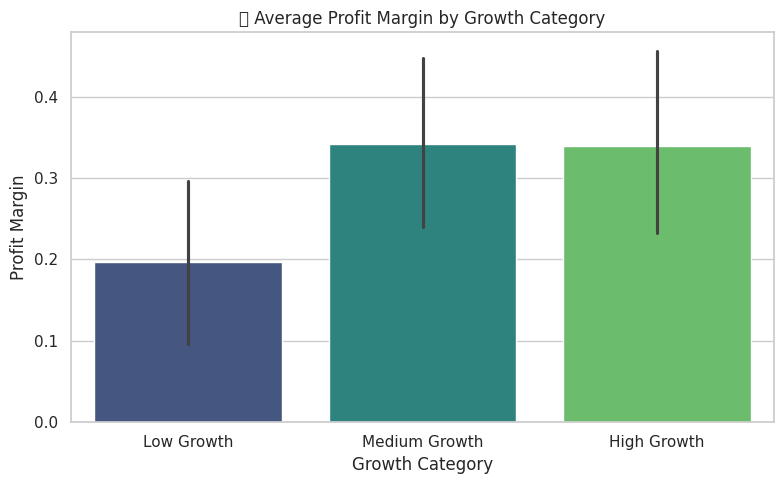

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Average profit margin by growth category
plt.figure(figsize=(8,5))
sns.barplot(x='growthCategory', y='profitMargin', data=df, palette='viridis')
plt.title('💰 Average Profit Margin by Growth Category')
plt.xlabel('Growth Category')
plt.ylabel('Profit Margin')
plt.tight_layout()
plt.show()


**Age & Country Insights**

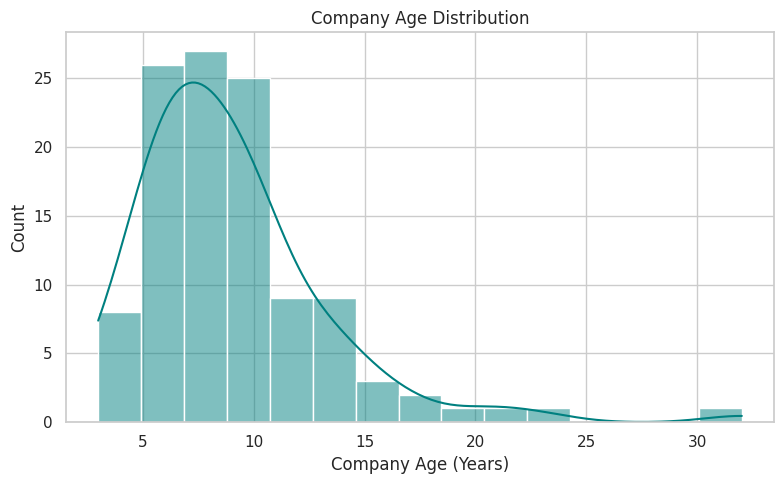

In [16]:
# 2. Company Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['companyAge'], bins=15, kde=True, color='teal')
plt.title('Company Age Distribution')
plt.xlabel('Company Age (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-17-d469ee3c0ad0>:9: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


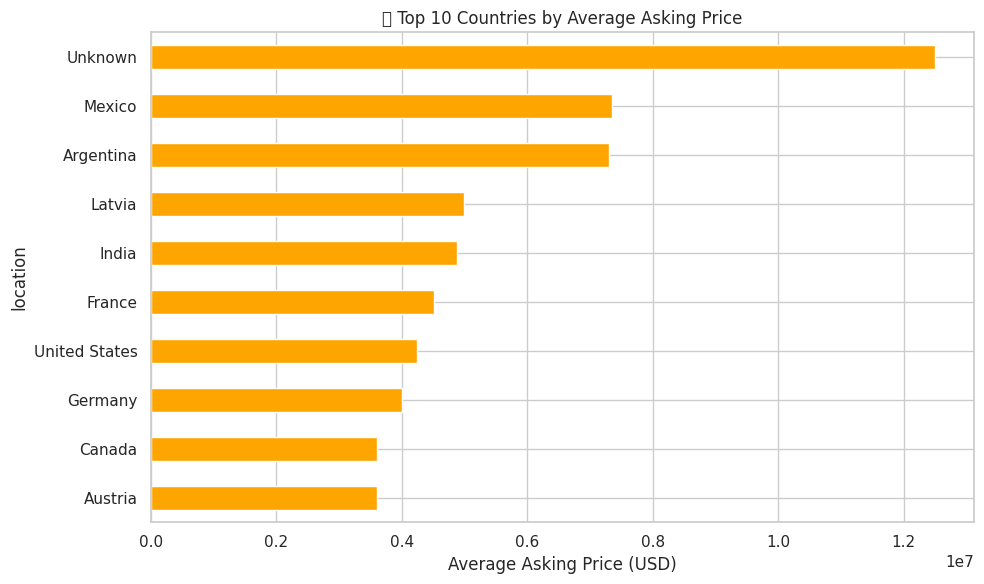

In [17]:
# Top 10 Countries by Average Asking Price
top_countries = df.groupby('location')['askingPrice'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='orange')
plt.title('🌍 Top 10 Countries by Average Asking Price')
plt.xlabel('Average Asking Price (USD)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Business Insights EDA**

Are higher revenue multiples justified by higher growth?

<ipython-input-18-d782e63f8d21>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


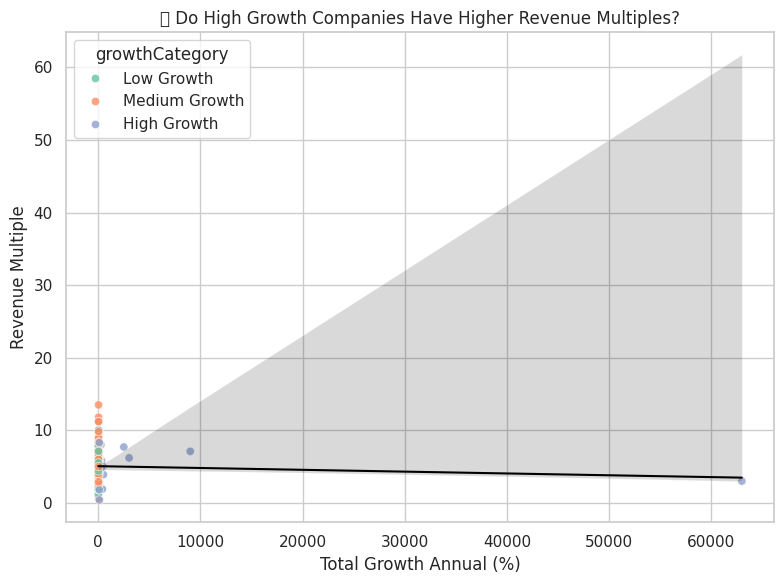

📌 Correlation between Revenue Multiple and Growth: -0.06


In [18]:
# 📌 Step 6.1: Explore relationship between Revenue Multiple and Growth %

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='totalGrowthAnnual', y='revenueMultiple', hue='growthCategory', palette='Set2', alpha=0.8)
sns.regplot(data=df, x='totalGrowthAnnual', y='revenueMultiple', scatter=False, color='black', line_kws={"linewidth":1.5})
plt.title("📈 Do High Growth Companies Have Higher Revenue Multiples?")
plt.xlabel("Total Growth Annual (%)")
plt.ylabel("Revenue Multiple")
plt.tight_layout()
plt.show()

# Check the correlation coefficient
correlation = df['totalGrowthAnnual'].corr(df['revenueMultiple'])
print(f"📌 Correlation between Revenue Multiple and Growth: {correlation:.2f}")


The regression line is slightly flat or declining, meaning:

There is no strong positive relationship between annual growth rate and revenue multiple in this dataset.

High growth companies (even those with 5,000%+ growth) are not consistently getting higher revenue multiples.

Revenue multiple is likely influenced by other factors like:

Profitability

Market size

Monetization model

Founders' reputation, etc.

**Do More Profitable Companies Have Higher Asking Prices?**

<ipython-input-19-75c45b0fb840>:9: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


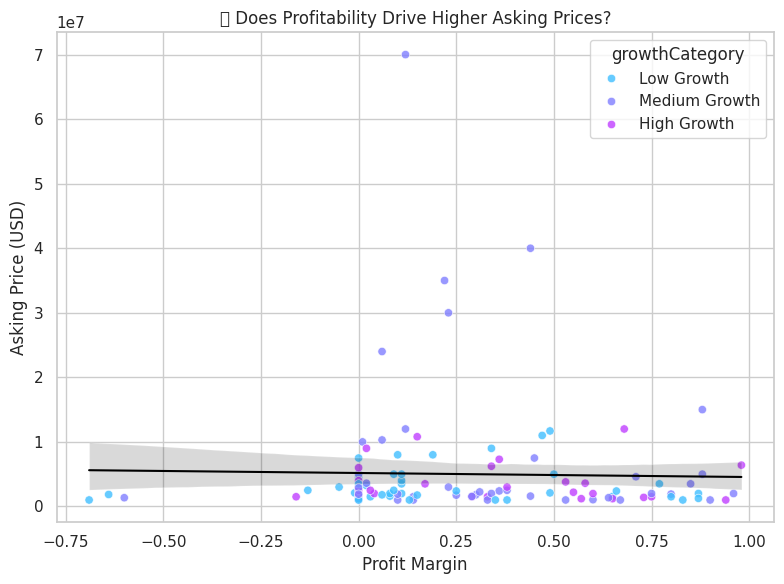

📌 Correlation between Profit Margin and Asking Price: -0.02


In [19]:
# 📌 Insight 2: Does Profit Margin Influence Asking Price?

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='profitMargin', y='askingPrice', hue='growthCategory', palette='cool', alpha=0.8)
sns.regplot(data=df, x='profitMargin', y='askingPrice', scatter=False, color='black', line_kws={"linewidth":1.5})
plt.title("💸 Does Profitability Drive Higher Asking Prices?")
plt.xlabel("Profit Margin")
plt.ylabel("Asking Price (USD)")
plt.tight_layout()
plt.show()

# Print correlation
correlation = df['profitMargin'].corr(df['askingPrice'])
print(f"📌 Correlation between Profit Margin and Asking Price: {correlation:.2f}")



The regression line is almost flat, possibly slightly declining.

This indicates that:

Higher profit margins do NOT strongly correlate with higher asking prices.

**Are Newer SaaS Startups Growing Faster?**

<ipython-input-20-5af116e2b714>:9: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


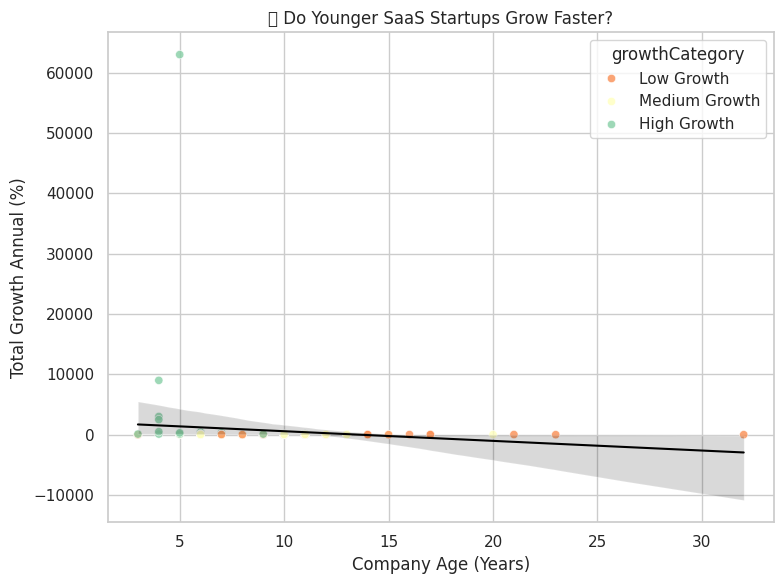

📌 Correlation between Company Age and Growth: -0.12


In [20]:
# 📌 Insight 3: Company Age vs Total Growth %

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='companyAge', y='totalGrowthAnnual', hue='growthCategory', palette='Spectral', alpha=0.8)
sns.regplot(data=df, x='companyAge', y='totalGrowthAnnual', scatter=False, color='black', line_kws={"linewidth":1.5})
plt.title("🚀 Do Younger SaaS Startups Grow Faster?")
plt.xlabel("Company Age (Years)")
plt.ylabel("Total Growth Annual (%)")
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['companyAge'].corr(df['totalGrowthAnnual'])
print(f"📌 Correlation between Company Age and Growth: {correlation:.2f}")


The regression line clearly slopes downward

This suggests a negative correlation: as company age increases, growth rate tends to decrease

A few younger companies show explosive growth (some >60,000%), likely early-stage breakout products

**Which Countries Offer the Best ROI?**

<ipython-input-22-31df2c8ba223>:18: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


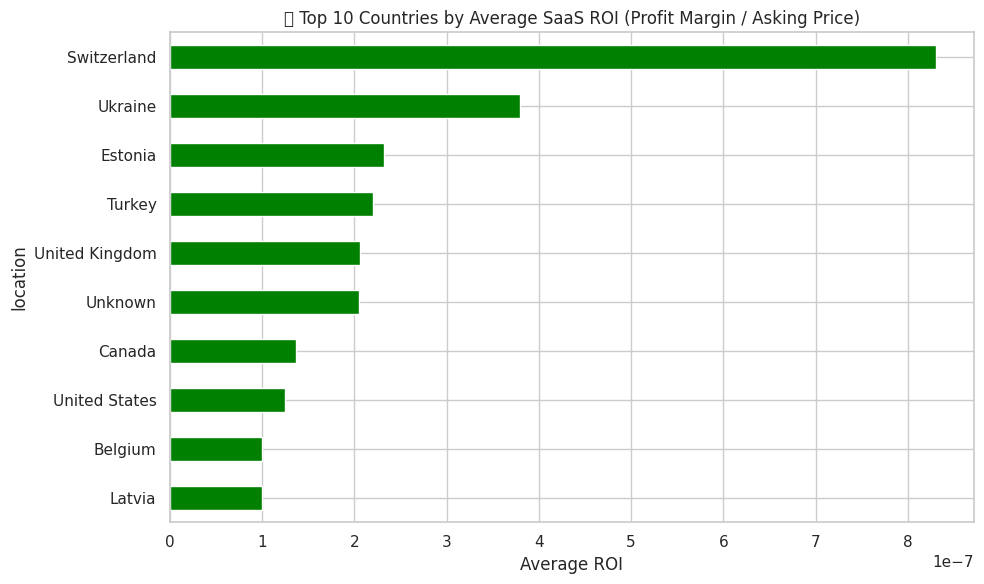

In [22]:
# 📌 Step 6.4: Which Countries Offer the Best ROI?

# Avoid division by zero or NaNs
df = df[df['askingPrice'] > 0]

# Create a new ROI column
df['ROI'] = df['profitMargin'] / df['askingPrice']

# Group by location and calculate average ROI
roi_by_country = df.groupby('location')['ROI'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
roi_by_country.plot(kind='barh', color='green')
plt.title("🌍 Top 10 Countries by Average SaaS ROI (Profit Margin / Asking Price)")
plt.xlabel("Average ROI")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Switzerland and Ukraine lead the chart with the highest ROI, meaning they offer:

High profit margins relative to their asking prices

Other strong contenders include Estonia, Turkey, and the UK

This implies:

These countries may offer undervalued SaaS opportunities with high potential returns, especially for investors seeking lower acquisition cost with strong margins.

In [24]:
from google.colab import files
files.download("saas_cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>